In [ ]:
import requests
import pandas as pd
import datetime

# Set your OpenWeatherMap API key
api_key = 'fb365aa6104829b44455572365ff3b4e'

In [ ]:

# Set the location for which you want to retrieve weather data
lat = 18.184135
lon = 74.610764

#https://openweathermap.org/api/one-call-3#how       How to use api call
# Construct the API URL
api_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"


In [ ]:

# Send a GET request to the API
response = requests.get(api_url)
weather_data = response.json()       #pass response to weather_data object(dictionary)


In [ ]:
weather_data.keys()

dict_keys(['cod', 'message', 'cnt', 'list', 'city'])

In [ ]:
weather_data['list'][0]

{'dt': 1696928400,
 'main': {'temp': 304.79,
  'feels_like': 304.45,
  'temp_min': 304.79,
  'temp_max': 305.97,
  'pressure': 1012,
  'sea_level': 1012,
  'grnd_level': 948,
  'humidity': 37,
  'temp_kf': -1.18},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'clouds': {'all': 6},
 'wind': {'speed': 2.86, 'deg': 25, 'gust': 2.4},
 'visibility': 10000,
 'pop': 0,
 'sys': {'pod': 'd'},
 'dt_txt': '2023-10-10 09:00:00'}

In [ ]:
len(weather_data['list'])

40

In [ ]:
weather_data['list'][0]['weather'][0]['description']

'clear sky'

In [ ]:
temperatures = [item['main']['temp'] for item in weather_data['list']]
timestamps = [pd.to_datetime(item['dt'], unit='s') for item in weather_data['list']]
temperature = [item['main']['temp'] for item in weather_data['list']]
humidity = [item['main']['humidity'] for item in weather_data['list']]
wind_speed = [item['wind']['speed'] for item in weather_data['list']]
weather_description = [item['weather'][0]['description'] for item in weather_data['list']]

weather_df = pd.DataFrame({
    'Timestamp': timestamps,
    'Temperature': temperatures,
    'humidity': humidity,
    'wind_speed': wind_speed,
    'weather_description': weather_description,
})

weather_df.set_index('Timestamp', inplace=True)

In [ ]:
max_temp = weather_df['Temperature'].max()

In [ ]:
max_temp

306.38

In [ ]:
min_temp = weather_df['Temperature'].min()

In [ ]:
min_temp

297.17

In [ ]:
weather_df.fillna(0, inplace=True)

weather_df['Temperature'] = weather_df['Temperature'].apply(lambda x: x - 273.15 if isinstance(x, float) else x)

print(weather_df)

                     Temperature  humidity  wind_speed weather_description
Timestamp                                                                 
2023-10-10 09:00:00        31.64        37        2.86           clear sky
2023-10-10 12:00:00        31.70        36        3.83          few clouds
2023-10-10 15:00:00        28.80        44        3.61    scattered clouds
2023-10-10 18:00:00        26.64        58        1.94    scattered clouds
2023-10-10 21:00:00        25.19        63        2.82           clear sky
2023-10-11 00:00:00        24.02        67        2.57           clear sky
2023-10-11 03:00:00        26.81        54        2.37           clear sky
2023-10-11 06:00:00        31.28        38        3.18           clear sky
2023-10-11 09:00:00        32.98        31        2.93           clear sky
2023-10-11 12:00:00        32.19        32        3.86           clear sky
2023-10-11 15:00:00        28.72        41        4.06          few clouds
2023-10-11 18:00:00      

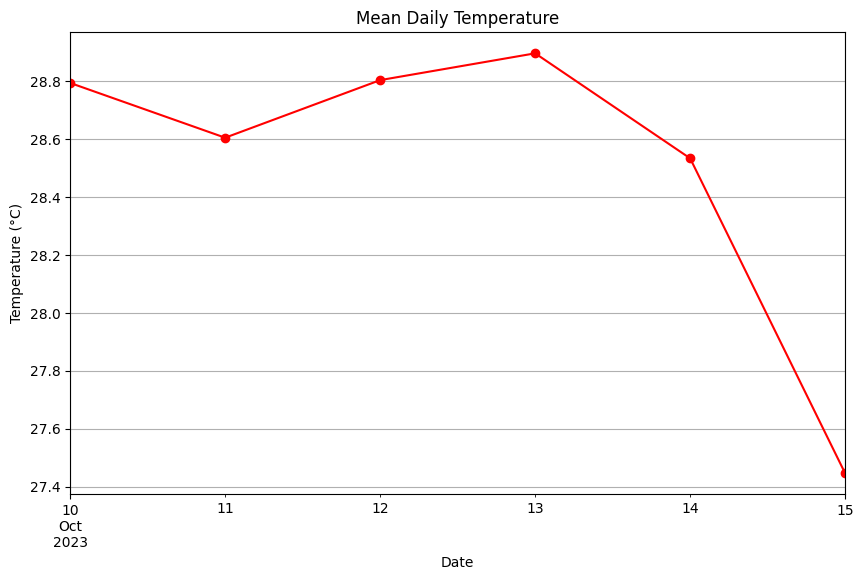

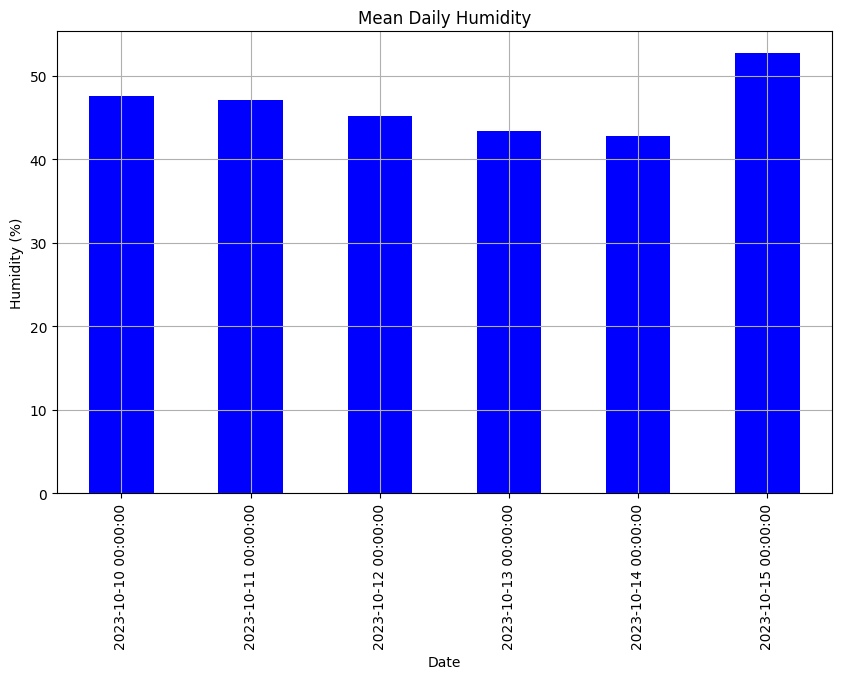

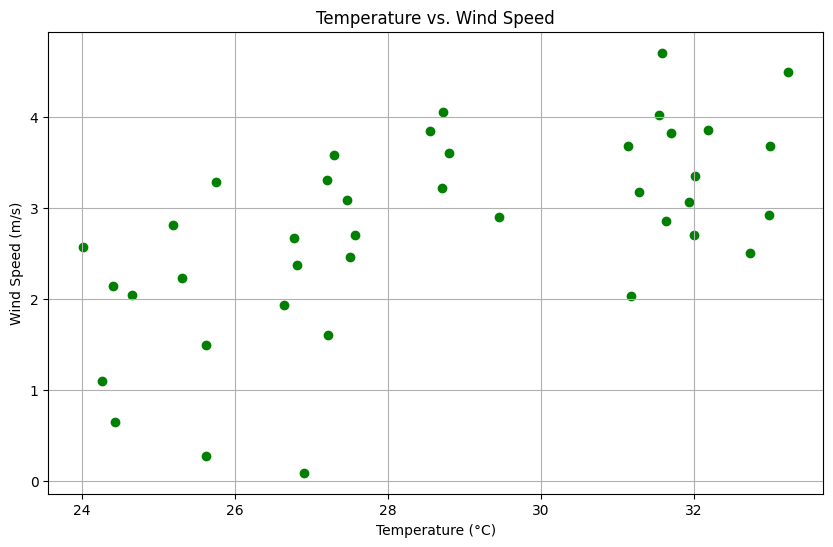

In [ ]:
import matplotlib.pyplot as plt
daily_mean_temp = weather_df['Temperature'].resample('D').mean()
daily_mean_humidity = weather_df['humidity'].resample('D').mean()
daily_mean_wind_speed = weather_df['wind_speed'].resample('D').mean()
plt.figure(figsize=(10, 6))
daily_mean_temp.plot(color='red', linestyle='-', marker='o')
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
daily_mean_humidity.plot(kind='bar', color='blue')
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(weather_df['Temperature'], weather_df['wind_speed'], color='green')
plt.title('Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

###Heatmap

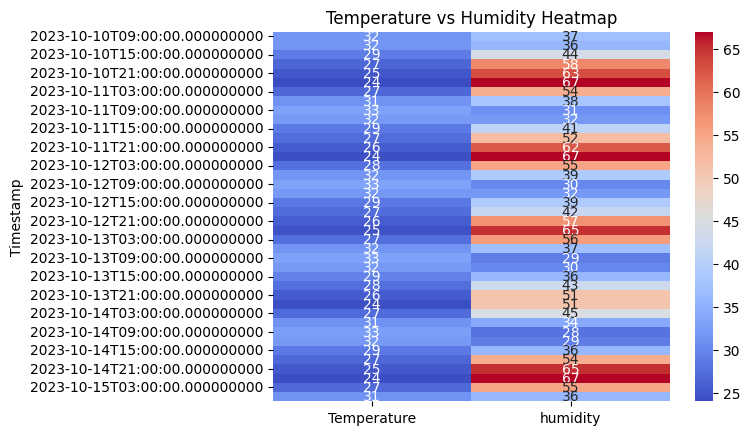

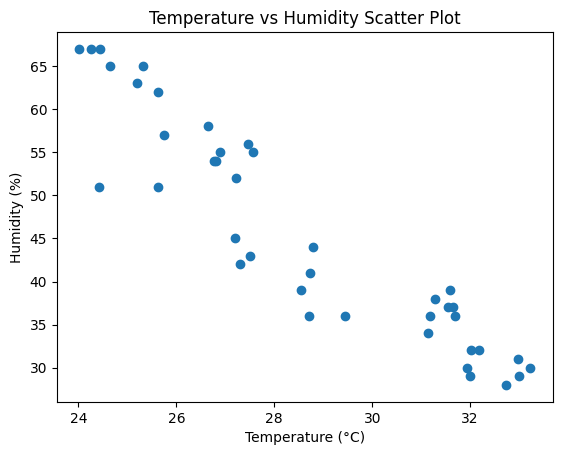

In [ ]:
import seaborn as sns

heatmap_data = weather_df[['Temperature', 'humidity']]
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Temperature vs Humidity Heatmap')
plt.show()

plt.scatter(weather_df['Temperature'], weather_df['humidity'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity Scatter Plot')
plt.show()

###Geospatial Map

In [ ]:
import requests
import pandas as pd
import geopandas as gpd
import folium
api_key = 'fb365aa6104829b44455572365ff3b4e'
locations = ['London', 'Paris', 'New York']
weather_df = pd.DataFrame()
for location in locations:
    api_url = f'http://api.openweathermap.org/data/2.5/weather?q={location}&appid={api_key}'
    response = requests.get(api_url)
    weather_data = response.json()
    temperature = weather_data['main']['temp']
    humidity = weather_data['main']['humidity']
    wind_speed = weather_data['wind']['speed']
    latitude = weather_data['coord']['lat']
    longitude = weather_data['coord']['lon']
    location_df = pd.DataFrame({
        'Location': [location],
        'Temperature': [temperature],
        'Humidity': [humidity],
        'Wind Speed': [wind_speed],
        'Latitude': [latitude],
        'Longitude': [longitude]
    })
    weather_df = weather_df.append(location_df, ignore_index=True)


<ipython-input-16-a2db3d574a5a>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weather_df = weather_df.append(location_df, ignore_index=True)
<ipython-input-16-a2db3d574a5a>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weather_df = weather_df.append(location_df, ignore_index=True)
<ipython-input-16-a2db3d574a5a>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weather_df = weather_df.append(location_df, ignore_index=True)


In [ ]:
weather_df

,Location,Temperature,Humidity,Wind Speed,Latitude,Longitude
0,London,287.39,79,2.06,51.5085,-0.1257
1,Paris,285.62,84,1.54,48.8534,2.3488
2,New York,284.89,76,3.09,40.7143,-74.0060


In [ ]:

world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

world_map.rename(columns={'name': 'Location'}, inplace=True)

weather_map = world_map.merge(weather_df, on='Location')

map_center = [weather_df['Latitude'].mean(), weather_df['Longitude'].mean()]
weather_map_folium = folium.Map(location=map_center, zoom_start=2)

for index, row in weather_map.iterrows():
    location = [row['Latitude'], row['Longitude']]
    temperature = row['Temperature']
    marker_text = f'Temperature: {temperature} K'
    folium.Marker(location, popup=marker_text, icon=folium.Icon(icon='cloud', color='red')).add_to(weather_map_folium)

weather_map_folium


<ipython-input-18-c9bd718791be>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))


In [ ]:
type(weather_map_folium)

folium.folium.Map